<a href="https://colab.research.google.com/github/smartinternz02/SBSPS-Challenge-7222-SDG-3-Good-health-and-well-being/blob/main/my_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import os
import shutil
import glob
import matplotlib.pyplot as plt

import keras
from keras.preprocessing import image
from keras.layers import Dense, Conv2D, MaxPool2D, Dropout, Flatten
from keras.models import Sequential


In [13]:
train_data_gen = image.ImageDataGenerator(zoom_range= 0.2, horizontal_flip= True, shear_range= 0.2 , rescale= 1./255)
train = train_data_gen.flow_from_directory(directory="/content/drive/MyDrive/datasets/train" , target_size=(256,256) , batch_size=16, class_mode='binary')

Found 716 images belonging to 2 classes.


In [14]:
train.class_indices

{'CT_COVID': 0, 'CT_NonCOVID': 1}

In [15]:
test_data_gen = image.ImageDataGenerator( rescale= 1./255)
test = train_data_gen.flow_from_directory(directory="/content/drive/MyDrive/datasets/test" , target_size=(256,256) , batch_size=16, class_mode='binary')

Found 30 images belonging to 2 classes.


In [16]:
t_img , label = train.next()

In [17]:
def plotImages(img_arr, label):

  for im, l in zip(img_arr,label) :
    plt.figure(figsize= (5,5))
    plt.imshow(im, cmap = 'gray')
    plt.title(im.shape)
    plt.axis = False
    plt.show()

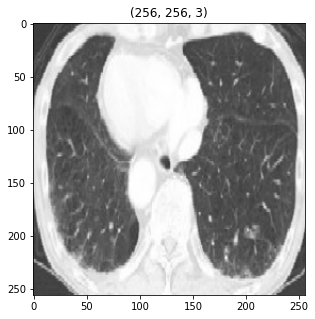

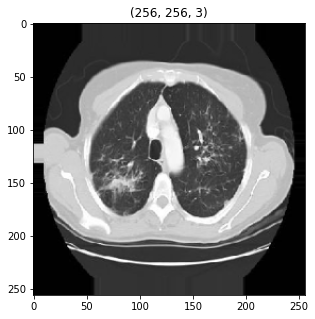

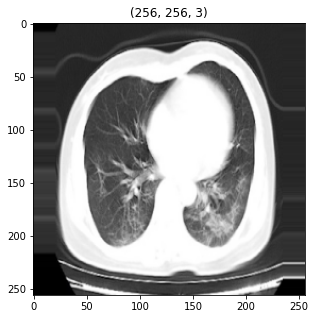

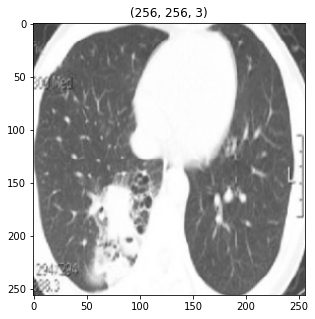

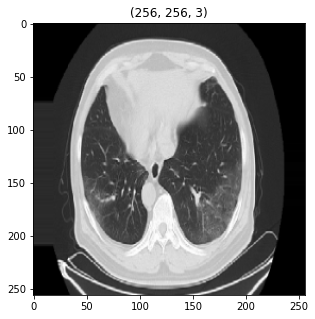

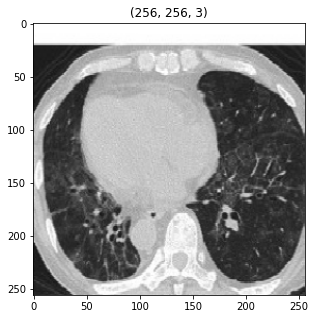

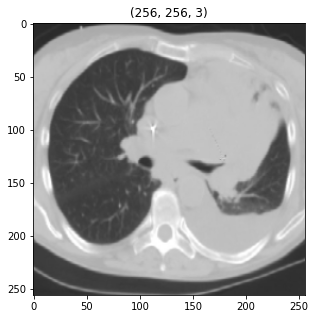

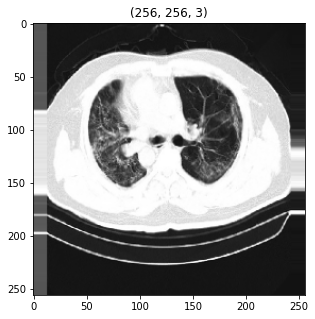

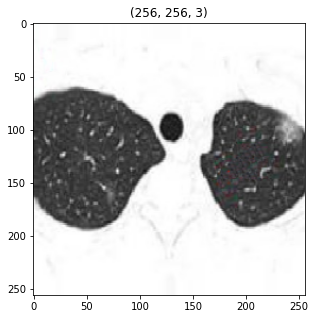

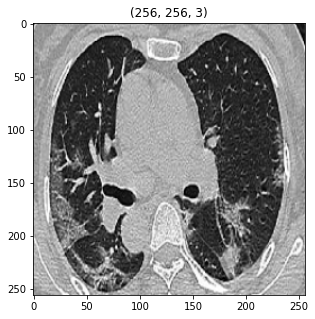

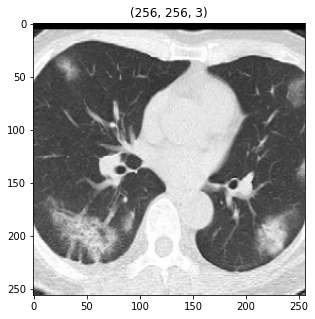

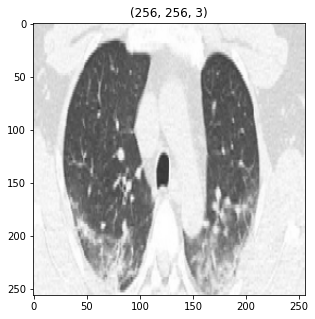

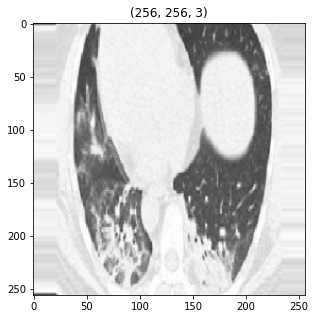

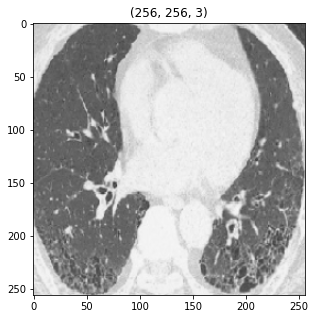

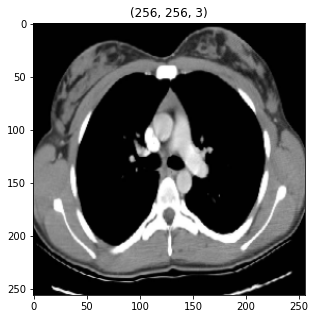

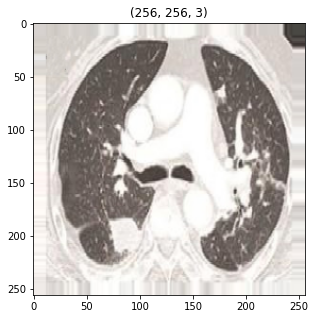

In [18]:
plotImages(t_img, label)

In [19]:
model= Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),activation='relu', input_shape=(256,256,3)))

model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout (rate=0.25))


model.add(Conv2D(filters=64, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout (rate=0.25))

model.add(Conv2D(filters=128, kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D())
model.add(Dropout (rate=0.25))

model.add(Flatten())
model.add(Dense(units=64, activation='relu'))
model.add(Dropout(rate=0.50))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(loss=keras.losses.binary_crossentropy, optimizer="adam",metrics=['acc'])

In [20]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 254, 254, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 252, 252, 64)      18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 126, 126, 64)     0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 126, 126, 64)      0         
                                                                 
 conv2d_14 (Conv2D)          (None, 124, 124, 64)      36928     
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 62, 62, 64)       0         
 g2D)                                                 

In [24]:
model.fit_generator(train, steps_per_epoch=8,epochs=20,validation_steps=2, validation_data=test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/20
8/8 [==============================] - 51s 6s/step - loss: 0.6668 - acc: 0.5547 - val_loss: 0.6604 - val_acc: 0.6333
Epoch 2/20
8/8 [==============================] - 49s 6s/step - loss: 0.6704 - acc: 0.5469 - val_loss: 0.6665 - val_acc: 0.6333
Epoch 3/20
8/8 [==============================] - 49s 6s/step - loss: 0.6608 - acc: 0.5469 - val_loss: 0.6707 - val_acc: 0.5333
Epoch 4/20
8/8 [==============================] - 50s 6s/step - loss: 0.6485 - acc: 0.6562 - val_loss: 0.6718 - val_acc: 0.5333
Epoch 5/20
8/8 [==============================] - 50s 6s/step - loss: 0.6389 - acc: 0.6562 - val_loss: 0.6661 - val_acc: 0.6000
Epoch 6/20
8/8 [==============================] - 49s 6s/step - loss: 0.6628 - acc: 0.5859 - val_loss: 0.6582 - val_acc: 0.5333
Epoch 7/20
8/8 [==============================] - 49s 6s/step - loss: 0.6463 - acc: 0.6562 - val_loss: 0.6560 - val_acc: 0.5000
Epoch 8/20
8/8 [==============================] - 49s 6s/step - loss: 0.6659 - acc: 0.5859 - val_loss: 0